In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np

In [6]:
a = pd.read_csv("solutions_TSPA.csv")
b = pd.read_csv("solutions_TSPB.csv")
a_scores, b_scores = a["x101"], b["x101"]
a = a.drop(columns=["x101"])
b = b.drop(columns=["x101"])
a_best = a_scores.argmin()
b_best = b_scores.argmin()

In [7]:
def count_common_edges(solution1, solution2):
    """
    Computes the number of common edges between two TSP solutions.
    Assumes solutions are lists of nodes representing a tour.
    """
    edges1 = set()
    for i in range(len(solution1)):
        node1 = solution1[i]
        node2 = solution1[(i + 1) % len(solution1)]
        edges1.add(tuple(sorted((node1, node2))))

    edges2 = set()
    for i in range(len(solution2)):
        node1 = solution2[i]
        node2 = solution2[(i + 1) % len(solution2)]
        edges2.add(tuple(sorted((node1, node2))))

    return len(edges1.intersection(edges2))


def count_common_nodes(solution1, solution2):
    """
    Computes the number of common nodes between two solutions.
    """
    nodes1 = set(solution1)
    nodes2 = set(solution2)
    return len(nodes1.intersection(nodes2))

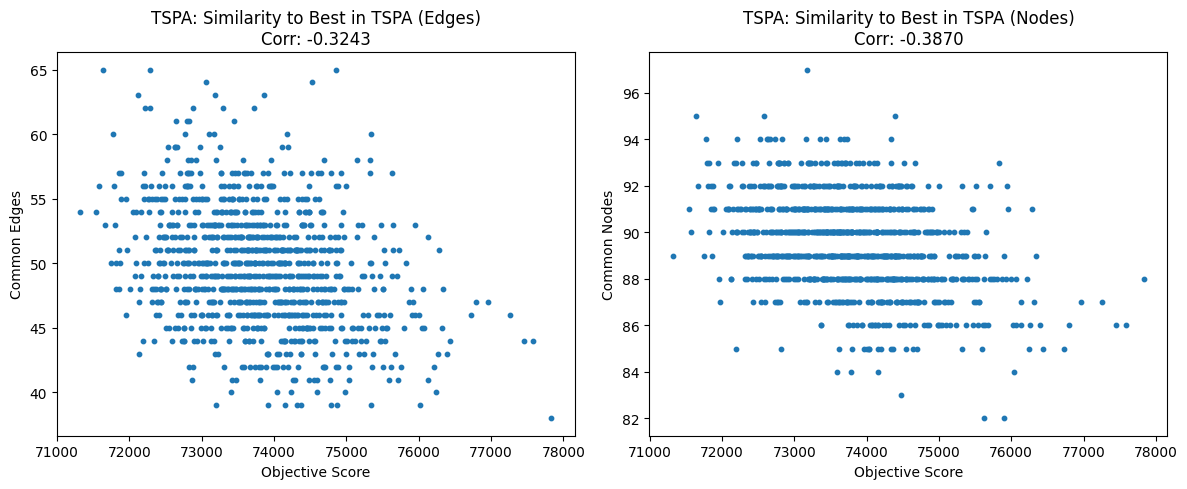

In [8]:
### 1. TSPA: Similarity to Best in TSPA

best_solution_a = list(a.iloc[a_best])
scores_without_best_a = a_scores.drop(a_best)
solutions_without_best_a = a.drop(a_best)


# By common edges
similarities_edges = [
    count_common_edges(list(solution), best_solution_a)
    for i, solution in solutions_without_best_a.iterrows()
]
correlation_edges = np.corrcoef(scores_without_best_a, similarities_edges)[0, 1]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(scores_without_best_a, similarities_edges, s=10)
plt.title(f"TSPA: Similarity to Best in TSPA (Edges)\nCorr: {correlation_edges:.4f}")
plt.xlabel("Objective Score")
plt.ylabel("Common Edges")

# By common nodes
similarities_nodes = [
    count_common_nodes(list(solution), best_solution_a)
    for i, solution in solutions_without_best_a.iterrows()
]
correlation_nodes = np.corrcoef(scores_without_best_a, similarities_nodes)[0, 1]

plt.subplot(1, 2, 2)
plt.scatter(scores_without_best_a, similarities_nodes, s=10)
plt.title(f"TSPA: Similarity to Best in TSPA (Nodes)\nCorr: {correlation_nodes:.4f}")
plt.xlabel("Objective Score")
plt.ylabel("Common Nodes")
plt.tight_layout()
plt.show()

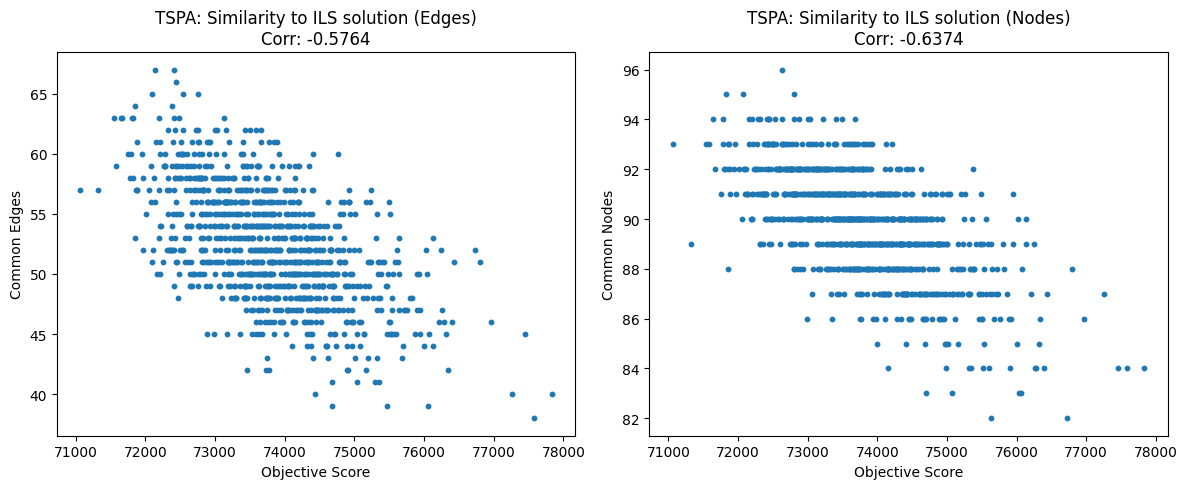

In [9]:
### 2. TSPA: Similarity to very good solution generated by the best method in TSPA

best_solution_a_ils = [147, 35, 161, 49, 55, 178, 11, 191, 5, 113, 85, 185, 36, 132, 150, 66, 117, 44, 43, 182, 160, 194, 42, 140, 69, 47, 116, 60, 119, 52, 152, 134, 163, 124, 128, 71, 136, 155, 181, 54, 101, 27, 87, 76, 102, 2, 98, 153, 3, 121, 45, 26, 17, 172, 176, 114, 32, 79, 146, 93, 130, 58, 180, 197, 82, 91, 166, 120, 41, 186, 56, 53, 107, 179, 50, 15, 145, 103, 63, 10, 149, 125, 95, 64, 80, 81, 177, 138, 24, 187, 90, 184, 144, 1, 118, 94, 141, 109, 19, 23]

# By common edges
similarities_edges = [
    count_common_edges(list(solution), best_solution_a_ils) for i, solution in a.iterrows()
]
correlation_edges = np.corrcoef(a_scores, similarities_edges)[0, 1]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(a_scores, similarities_edges, s=10)
plt.title(f"TSPA: Similarity to ILS solution (Edges)\nCorr: {correlation_edges:.4f}")
plt.xlabel("Objective Score")
plt.ylabel("Common Edges")

# By common nodes
similarities_nodes = [
    count_common_nodes(list(solution), best_solution_a_ils) for i, solution in a.iterrows()
]
correlation_nodes = np.corrcoef(a_scores, similarities_nodes)[0, 1]

plt.subplot(1, 2, 2)
plt.scatter(a_scores, similarities_nodes, s=10)
plt.title(f"TSPA: Similarity to ILS solution (Nodes)\nCorr: {correlation_nodes:.4f}")
plt.xlabel("Objective Score")
plt.ylabel("Common Nodes")
plt.tight_layout()
plt.show()

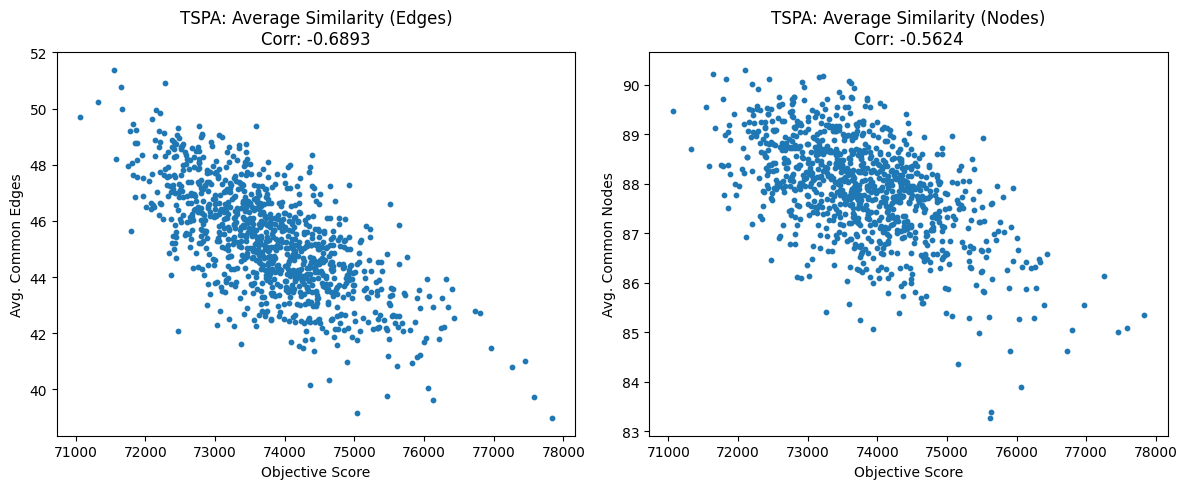

In [10]:
### 5. TSPA: Average Similarity within TSPA

avg_sim_edges = []
avg_sim_nodes = []
a_solutions = [list(row) for i, row in a.iterrows()]

for i, s1 in enumerate(a_solutions):
    total_sim_edges = 0
    total_sim_nodes = 0
    for j, s2 in enumerate(a_solutions):
        if i == j:
            continue
        total_sim_edges += count_common_edges(s1, s2)
        total_sim_nodes += count_common_nodes(s1, s2)
    avg_sim_edges.append(total_sim_edges / (len(a_solutions) - 1))
    avg_sim_nodes.append(total_sim_nodes / (len(a_solutions) - 1))

correlation_edges = np.corrcoef(a_scores, avg_sim_edges)[0, 1]
correlation_nodes = np.corrcoef(a_scores, avg_sim_nodes)[0, 1]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(a_scores, avg_sim_edges, s=10)
plt.title(f"TSPA: Average Similarity (Edges)\nCorr: {correlation_edges:.4f}")
plt.xlabel("Objective Score")
plt.ylabel("Avg. Common Edges")

plt.subplot(1, 2, 2)
plt.scatter(a_scores, avg_sim_nodes, s=10)
plt.title(f"TSPA: Average Similarity (Nodes)\nCorr: {correlation_nodes:.4f}")
plt.xlabel("Objective Score")
plt.ylabel("Avg. Common Nodes")
plt.tight_layout()
plt.show()

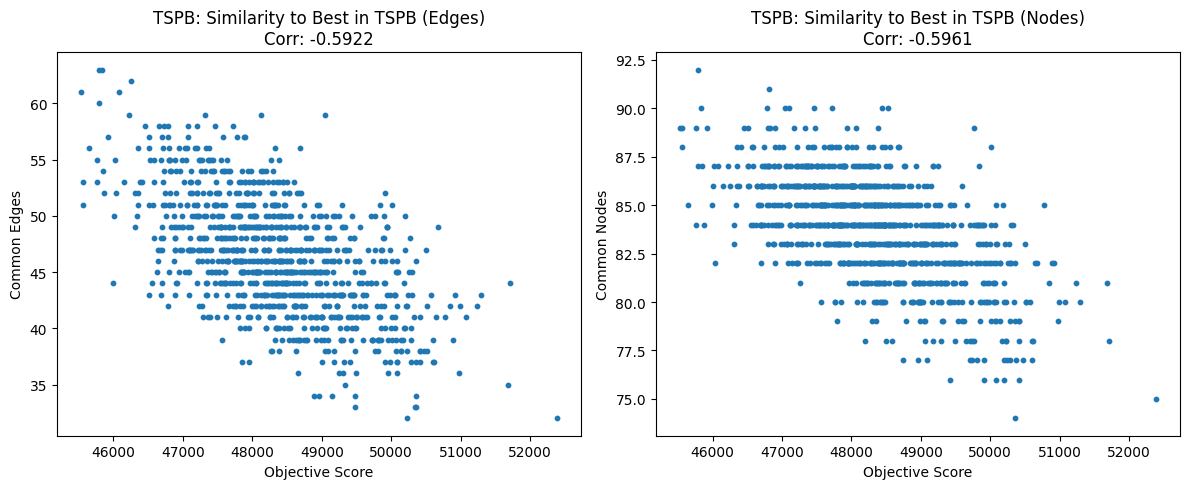

In [11]:
### 2. TSPB: Similarity to Best in TSPB

best_solution_b = list(b.iloc[b_best])
scores_without_best_b = b_scores.drop(b_best)
solutions_without_best_b = b.drop(b_best)

# By common edges
similarities_edges = [
    count_common_edges(list(solution), best_solution_b)
    for i, solution in solutions_without_best_b.iterrows()
]
correlation_edges = np.corrcoef(scores_without_best_b, similarities_edges)[0, 1]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(scores_without_best_b, similarities_edges, s=10)
plt.title(f"TSPB: Similarity to Best in TSPB (Edges)\nCorr: {correlation_edges:.4f}")
plt.xlabel("Objective Score")
plt.ylabel("Common Edges")

# By common nodes
similarities_nodes = [
    count_common_nodes(list(solution), best_solution_b)
    for i, solution in solutions_without_best_b.iterrows()
]
correlation_nodes = np.corrcoef(scores_without_best_b, similarities_nodes)[0, 1]

plt.subplot(1, 2, 2)
plt.scatter(scores_without_best_b, similarities_nodes, s=10)
plt.title(f"TSPB: Similarity to Best in TSPB (Nodes)\nCorr: {correlation_nodes:.4f}")
plt.xlabel("Objective Score")
plt.ylabel("Common Nodes")
plt.tight_layout()
plt.show()

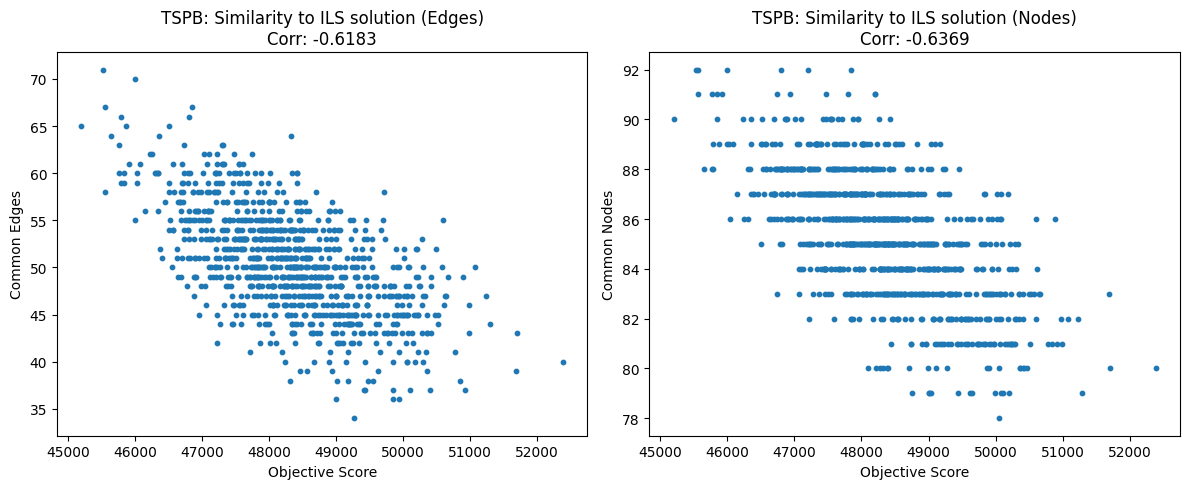

In [12]:
### 2. TSPB: Similarity to very good solution generated by the best method in TSPA

best_solution_b_ils = [6, 178, 37, 62, 92, 142, 78, 82, 154, 188, 164, 90, 128, 104, 114, 177, 195, 167, 87, 186, 96, 131, 100, 180, 67, 95, 48, 149, 61, 21, 29, 150, 5, 141, 184, 153, 171, 35, 56, 19, 63, 125, 107, 144, 36, 110, 1, 30, 112, 83, 22, 9, 105, 145, 161, 34, 139, 12, 140, 169, 196, 14, 146, 16, 4, 71, 133, 170, 189, 7, 148, 192, 91, 52, 122, 132, 136, 123, 134, 108, 41, 64, 39, 28, 17, 2, 157, 199, 118, 194, 32, 55, 74, 137, 191, 81, 46, 143, 176, 79]

# By common edges
similarities_edges = [
    count_common_edges(list(solution), best_solution_b_ils) for i, solution in b.iterrows()
]
correlation_edges = np.corrcoef(b_scores, similarities_edges)[0, 1]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(b_scores, similarities_edges, s=10)
plt.title(f"TSPB: Similarity to ILS solution (Edges)\nCorr: {correlation_edges:.4f}")
plt.xlabel("Objective Score")
plt.ylabel("Common Edges")

# By common nodes
similarities_nodes = [
    count_common_nodes(list(solution), best_solution_b_ils) for i, solution in b.iterrows()
]
correlation_nodes = np.corrcoef(b_scores, similarities_nodes)[0, 1]

plt.subplot(1, 2, 2)
plt.scatter(b_scores, similarities_nodes, s=10)
plt.title(f"TSPB: Similarity to ILS solution (Nodes)\nCorr: {correlation_nodes:.4f}")
plt.xlabel("Objective Score")
plt.ylabel("Common Nodes")
plt.tight_layout()
plt.show()

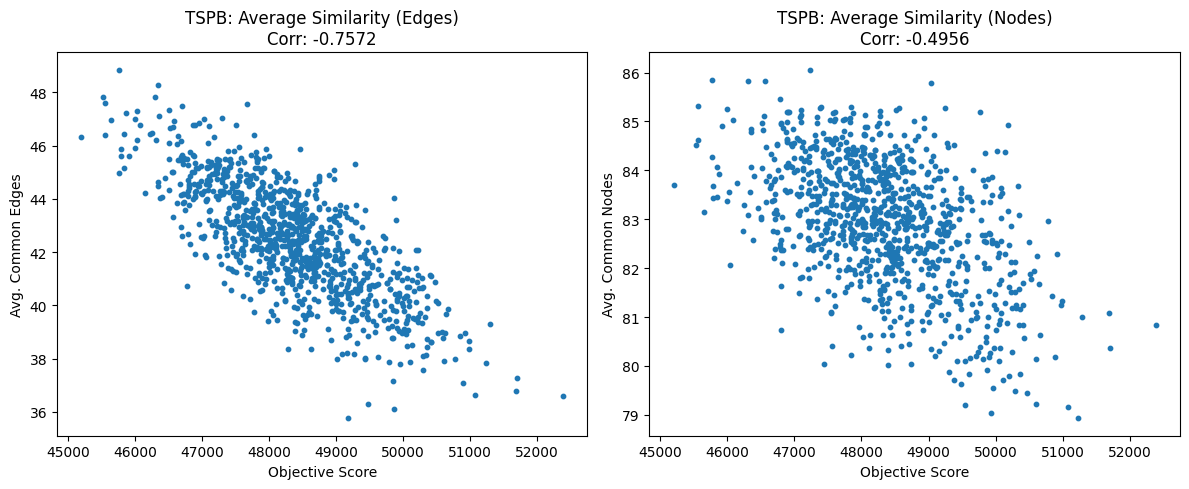

In [13]:
### 6. TSPB: Average Similarity within TSPB

avg_sim_edges = []
avg_sim_nodes = []
b_solutions = [list(row) for i, row in b.iterrows()]

for i, s1 in enumerate(b_solutions):
    total_sim_edges = 0
    total_sim_nodes = 0
    for j, s2 in enumerate(b_solutions):
        if i == j:
            continue
        total_sim_edges += count_common_edges(s1, s2)
        total_sim_nodes += count_common_nodes(s1, s2)
    avg_sim_edges.append(total_sim_edges / (len(b_solutions) - 1))
    avg_sim_nodes.append(total_sim_nodes / (len(b_solutions) - 1))

correlation_edges = np.corrcoef(b_scores, avg_sim_edges)[0, 1]
correlation_nodes = np.corrcoef(b_scores, avg_sim_nodes)[0, 1]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(b_scores, avg_sim_edges, s=10)
plt.title(f"TSPB: Average Similarity (Edges)\nCorr: {correlation_edges:.4f}")
plt.xlabel("Objective Score")
plt.ylabel("Avg. Common Edges")

plt.subplot(1, 2, 2)
plt.scatter(b_scores, avg_sim_nodes, s=10)
plt.title(f"TSPB: Average Similarity (Nodes)\nCorr: {correlation_nodes:.4f}")
plt.xlabel("Objective Score")
plt.ylabel("Avg. Common Nodes")
plt.tight_layout()
plt.show()